In [11]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
from evaluate_model import evaluate_model, get_data
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
shape, classes, data = get_data()
train_data, val_data, test_data = data 

Found 2392 files belonging to 2 classes.
Using 1914 files for training.
Found 2392 files belonging to 2 classes.
Using 478 files for validation.
Found 597 files belonging to 2 classes.


In [5]:
inputs = Input(shape= shape)
pretrained_mobilenet_V3_Small = tf.keras.applications.MobileNetV3Small(
    include_top=False,
    classes=len(classes),
    classifier_activation=None
)
for layer in pretrained_mobilenet_V3_Small.layers:
    layer.trainable = False
    layer1 = pretrained_mobilenet_V3_Small(inputs)
    layer2 = Flatten()(layer1)
    layer3 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer2)
    outputs = Dense(len(classes), activation='softmax')(layer3)
    mobilenet_V3_small_model = Model(inputs=inputs, outputs=outputs)

mobilenet_V3_small_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mobilenet_V3_small_model.summary()

Model: "model_228"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 MobilenetV3small (Function  (None, None, None, 576)   939120    
 al)                                                             
                                                                 
 flatten_228 (Flatten)       (None, 14400)             0         
                                                                 
 dense_456 (Dense)           (None, 128)               1843328   
                                                                 
 dense_457 (Dense)           (None, 2)                 258       
                                                                 
Total params: 2782706 (10.62 MB)
Trainable params: 1843586 (7.03 MB)
Non-trainable params: 939120 (3.58 MB)
_______________

In [6]:
mobilenet_V3_small_model_hist = mobilenet_V3_small_model.fit(
  train_data,
  validation_data=val_data,
  epochs=7
)

Epoch 1/7
60/60 [==============================] - 10s 115ms/step - loss: 2.0507 - accuracy: 0.8762 - val_loss: 0.9668 - val_accuracy: 0.9916
Epoch 2/7
60/60 [==============================] - 7s 118ms/step - loss: 0.7034 - accuracy: 0.9916 - val_loss: 0.5364 - val_accuracy: 0.9854
Epoch 3/7
60/60 [==============================] - 7s 118ms/step - loss: 0.4222 - accuracy: 0.9932 - val_loss: 0.3734 - val_accuracy: 0.9728
Epoch 4/7
60/60 [==============================] - 7s 118ms/step - loss: 0.2841 - accuracy: 0.9953 - val_loss: 0.2636 - val_accuracy: 0.9895
Epoch 5/7
60/60 [==============================] - 7s 117ms/step - loss: 0.2131 - accuracy: 0.9922 - val_loss: 0.2187 - val_accuracy: 0.9833
Epoch 6/7
60/60 [==============================] - 8s 122ms/step - loss: 0.2183 - accuracy: 0.9822 - val_loss: 0.2659 - val_accuracy: 0.9582
Epoch 7/7
60/60 [==============================] - 7s 118ms/step - loss: 0.2042 - accuracy: 0.9869 - val_loss: 0.1890 - val_accuracy: 0.9854


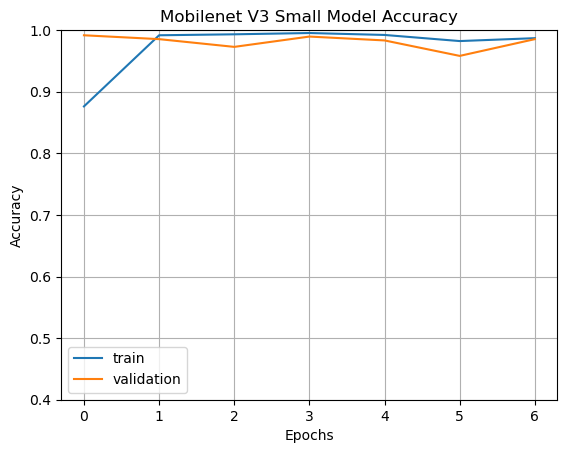

In [7]:
plt.plot(mobilenet_V3_small_model_hist.history['accuracy'])
plt.plot(mobilenet_V3_small_model_hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Mobilenet V3 Small Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

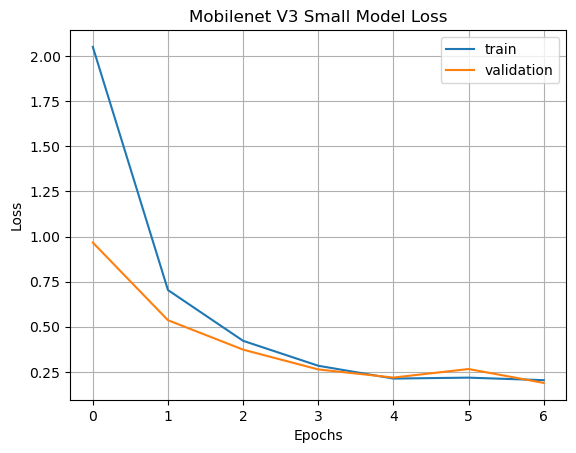

In [8]:
plt.plot(mobilenet_V3_small_model_hist.history['loss'])
plt.plot(mobilenet_V3_small_model_hist.history['val_loss'])
plt.grid()
plt.title('Mobilenet V3 Small Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

1/1 [==============================] - 1s 596ms/step


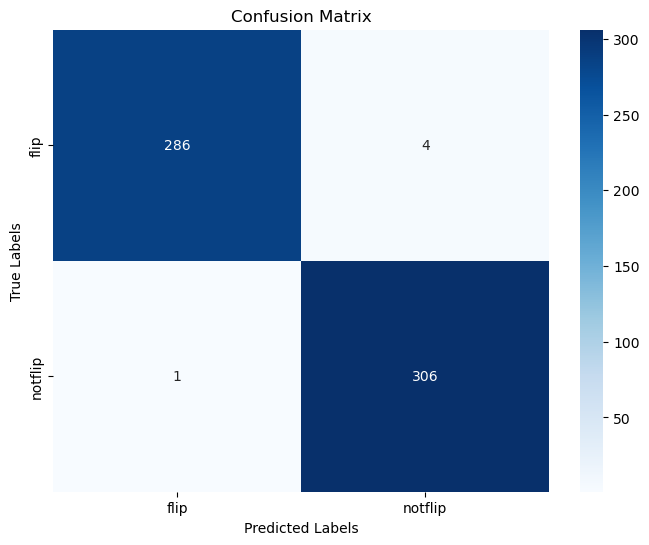

{'accuracy': 0.9916247906197655, 'f1_score': 0.9918962722852512}

In [9]:
evaluate_model(mobilenet_V3_small_model, test_data)

In [10]:
mobilenet_V3_small_model_path = '../models/mobilenet_V3_small_model.h5'
mobilenet_V3_small_model.save(mobilenet_V3_small_model_path)
mobilenet_V3_small_model_size = os.path.getsize(mobilenet_V3_small_model_path) / (1024 * 1024)
print('Model size: ', mobilenet_V3_small_model_size, 'MB')

Model size:  24.991989135742188 MB
